# Assignment 3

# Import data

In [9]:
import pandas as pd
# Read data that was exported from previous session
df = pd.read_csv("C:/Users/leo/Downloads/Assignment_3/df_out_dsif5.csv").sample(10000)
df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,term_numeric,debt_to_income,interest_per_loan_amnt,loan_amnt_log,grade_encoded,loan_amnt_std,annual_inc_std,loan_amnt_norm,annual_inc_norm,loan_default
89119,96409607,18000.0,18000.0,18000.0,36 months,13.49%,610.75,C,C2,Technology Consultant,...,36,0.189474,7284.6000,9.798183,2,0.281748,0.171637,0.440204,0.008637,False
15982,94037348,33575.0,33575.0,33575.0,36 months,17.99%,1213.65,D,D2,CEO,...,36,0.459932,18120.4275,10.421567,3,1.926738,-0.080588,0.836514,0.006637,True
66842,7295309,29700.0,29700.0,29700.0,60 months,17.10%,739.72,C,C5,home depot,...,60,0.450000,25393.5000,10.298936,2,1.517471,-0.160841,0.737913,0.006000,True
40777,73826047,30000.0,30000.0,30000.0,60 months,17.27%,749.94,D,D2,Revenue Officer,...,60,0.372111,25905.0000,10.308986,3,1.549156,0.006785,0.745547,0.007330,False
44838,132671143,12000.0,12000.0,12000.0,60 months,17.47%,301.28,D,D1,NaN,...,60,0.303030,10482.0000,9.392745,3,-0.351956,-0.463510,0.287532,0.003600,False


# Data preprocessing

In [11]:
# Let's use same features used by model previously built, plus the categorical ones
features = ['installment', 'revol_bal', 'recoveries', 'collection_recovery_fee',
       'last_fico_range_high', 'last_fico_range_low', 'tot_cur_bal',
       'open_acc_6m', 'open_il_24m', 'total_bal_il', 'inq_fi',
       'acc_open_past_24mths', 'bc_util', 'mo_sin_old_il_acct',
       'percent_bc_gt_75', 'total_il_high_credit_limit', 'last_pymnt_amnt_log',
       'last_pymnt_amnt_capped', 'grade_encoded', 'annual_inc_std']

X = df[features]
y = df['loan_default']

print(f"Number of features: {len(features)}")

Number of features: 20


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling (alternative: StandardScaler for z-score normalization)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame with same column names
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
X_scaled_df.head()

,installment,revol_bal,recoveries,collection_recovery_fee,last_fico_range_high,last_fico_range_low,tot_cur_bal,open_acc_6m,open_il_24m,total_bal_il,inq_fi,acc_open_past_24mths,bc_util,mo_sin_old_il_acct,percent_bc_gt_75,total_il_high_credit_limit,last_pymnt_amnt_log,last_pymnt_amnt_capped,grade_encoded,annual_inc_std
0,0.371886,0.053536,0.000000,0.000000,0.845882,0.846154,0.026688,0.125,0.000000,0.051287,0.000000,0.064516,0.626506,0.138229,0.25,0.077856,0.706662,0.104202,0.333333,0.019588
1,0.758442,0.027167,0.174545,0.174545,0.651765,0.650888,0.015687,0.000,0.071429,0.033483,0.000000,0.096774,0.418675,0.200864,0.00,0.043397,0.668678,0.069590,0.500000,0.015052
2,0.454577,0.041585,0.073328,0.073301,0.675294,0.674556,0.083681,NaN,NaN,NaN,NaN,0.129032,0.625000,0.231102,0.60,0.055861,0.622112,0.042415,0.333333,0.013608
3,0.461130,0.058607,0.000000,0.000000,0.857647,0.857988,0.105137,0.125,0.071429,0.049251,0.041667,0.161290,0.499247,0.336933,0.50,0.110952,0.942070,1.000000,0.500000,0.016623
4,0.173466,0.008925,0.000000,0.000000,0.781176,0.781065,0.021180,0.125,0.142857,0.066746,0.000000,0.290323,0.128765,0.345572,0.00,0.093347,0.863619,0.552171,0.500000,0.008165


# Building a neural network model

In [17]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (returns pandas dfs)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.3, random_state=42)

# Starting with a simple architecture

In [65]:
!pip install tensorflow

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model (empty intiially)
model_3 = Sequential()

# Adding layers to our model, which are like different parts of the brain.
# Each layer has "neurons" (like tiny decision-makers):

# Add the first part of our brain that looks at the data
model_3.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu'))

# smaller brain part that processes what the first layer has figured out.
model_3.add(Dense(8, activation='relu'))

#This is like the brain's decision-making part, where it makes a yes/no decision (like "Will this person pay back their loan?").
model_3.add(Dense(1, activation='sigmoid'))

# Compile the model
model_3.compile(
    optimizer='adam', # like the brain’s coach, guiding it to get better and better at its task
    loss='binary_crossentropy', # how the brain measures its mistakes,  for optimisation
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
    )

C:\Users\leo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
# Train the model
history = model_3.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - AUC: 0.4881 - Precision: 0.1154 - Recall: 0.0256 - accuracy: 0.8536 - loss: 0.6605 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.5468
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5091 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8691 - loss: 0.5132 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.4292
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4932 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8743 - loss: 0.4137 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.3899
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.4977 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8715 - loss: 0.3890 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.

In [37]:
# Compare to the model in the previous session

# Make predictions
y_prob = model_3.predict(X_test)
y_pred = (y_prob > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [39]:
from dsif6utility import model_evaluation_report
model_evaluation_report(X_test, y_test, y_pred, y_prob)

Accuracy: 0.8733333333333333
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
ROC-AUC: 0.5
Confusion Matrix:
[[2620    0]
 [ 380    0]]


C:\Users\leo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Interpreting outputs produced

In [41]:
y_prob = pd.DataFrame(y_prob, columns=["prob"])

y_prob.prob.describe(percentiles = [i / 100 for i in [0, 1, 10, 25, 50, 75, 90, 95, 99, 100]])

count    3.000000e+03
mean     1.302571e-01
std      5.812421e-07
min      1.302571e-01
0%       1.302571e-01
1%       1.302571e-01
10%      1.302571e-01
25%      1.302571e-01
50%      1.302571e-01
75%      1.302571e-01
90%      1.302571e-01
95%      1.302571e-01
99%      1.302571e-01
100%     1.302571e-01
max      1.302571e-01
Name: prob, dtype: float64

# Detecting and dealing with overfitting in NNs

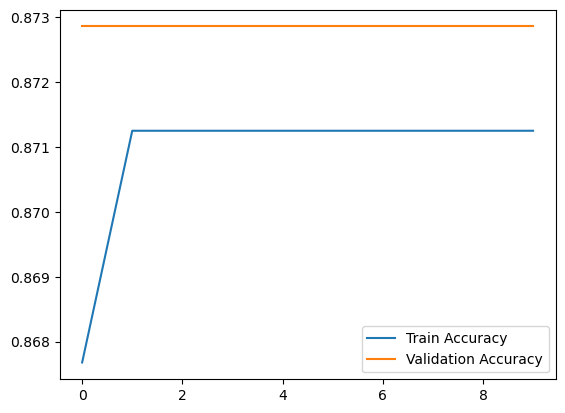

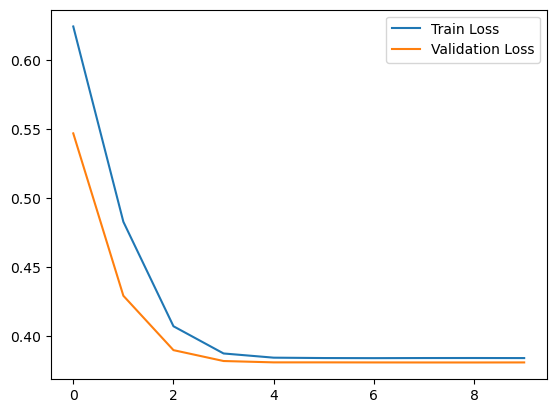

In [43]:
def plot_training_vs_overfitting(history):
    """Plot training and validation accuracy to detect overfitting (when gap between 2 is detected)"""
    import matplotlib.pyplot as plt
    
    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.show()

    # Plot loss
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()
    
plot_training_vs_overfitting(history)

# Add a dropout layer
Add a hidden layer

In [48]:
from tensorflow.keras.layers import Dropout

# Initialize the model
model4 = Sequential()

# First hidden layer with Dropout
model4.add(Dense(16, input_dim=X_scaled_df.shape[1], activation='relu'))
model4.add(Dropout(0.5))  # Drop 50% of neurons

# Second hidden layer with Dropout
model4.add(Dense(8, activation='relu'))
model4.add(Dropout(0.5))  # Drop 50% of neurons

# Output layer
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision', 'Recall', 'AUC']
)

C:\Users\leo\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - AUC: 0.4965 - Precision: 0.1429 - Recall: 0.0071 - accuracy: 0.8692 - loss: 0.6487 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.5300
Epoch 2/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.4763 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8642 - loss: 0.5165 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.4309
Epoch 3/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.5076 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8731 - loss: 0.4420 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8729 - val_loss: 0.3979
Epoch 4/10
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.4968 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8760 - loss: 0.4230 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.

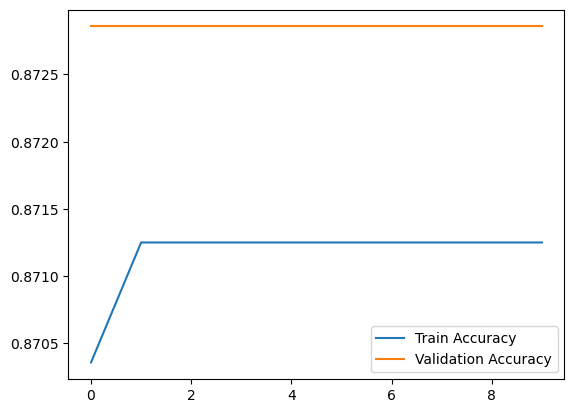

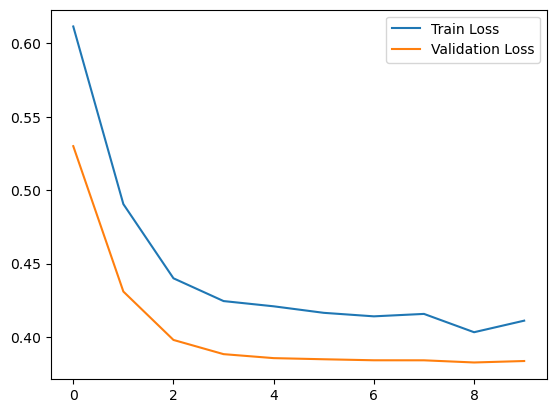

In [50]:
# Train the model
history2 = model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plot_training_vs_overfitting(history2)

# Early Stopping
**Early stopping halts training once the performance on the validation data stops improving. This prevents the model from overfitting after a certain point.**

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - AUC: 0.4959 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8749 - loss: 0.3771 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8733 - val_loss: 0.3801
Epoch 2/50
 67/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - AUC: 0.4990 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8830 - loss: 0.3616

C:\Users\leo\anaconda3\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_precision` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_loss
  current = self.get_monitor_value(logs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4973 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8772 - loss: 0.3728 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8733 - val_loss: 0.3800
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4943 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8737 - loss: 0.3794 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8733 - val_loss: 0.3800
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.4901 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8708 - loss: 0.3850 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.8733 - val_loss: 0.3800
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - AUC: 0.5002 - Precision: 0.0000e+00 - Recall: 0.0000e+00 - accuracy: 0.8681 - loss: 0.3902 - val_AUC: 0.5000 - val_Precision: 0.0000e+00 - val_Recall: 0.0000e+00 - val_accuracy: 0.873

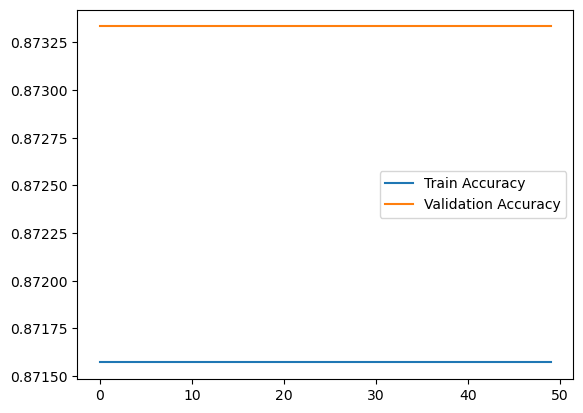

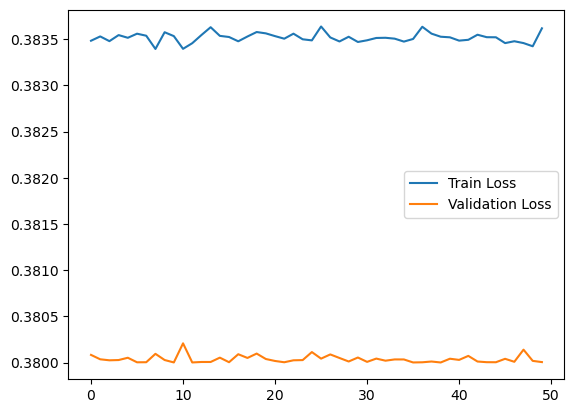

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_precision',  # Watch the validation loss
    patience=5,  # Stop if no improvement after 5 epochs
    mode='max',
    restore_best_weights=True  # Restore the model weights at the best epoch
)

# Train with early stopping
history3 = model_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)
plot_training_vs_overfitting(history3)